In [21]:
from nltk.corpus import reuters
import nltk
#nltk.download('reuters')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## Getting train and test dataset from nltk reuters corpus

In [2]:
train_documents, train_categories = zip(*[(reuters.raw(i), reuters.categories(i)) for i in reuters.fileids() if i.startswith('training/')])
test_documents, test_categories = zip(*[(reuters.raw(i), reuters.categories(i)) for i in reuters.fileids() if i.startswith('test/')])

In [3]:
print("Number of training documents:", len(train_documents))
print("Number of testing documents:", len(test_documents))

Number of training documents: 7769
Number of testing documents: 3019


In [ ]:
## distribution of document number per category

In [ ]:
## distribution of word counts per document

## Convert the categorical labels to Multi Label Encodings

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(train_categories)
test_labels = mlb.transform(test_categories)

In [17]:
train_labels = pd.DataFrame(train_labels)
train_labels.columns = mlb.classes_

test_labels = pd.DataFrame(test_labels)
test_labels.columns = mlb.classes_

whole_data = pd.concat([train_labels, test_labels], axis = 0).reset_index(drop = True)
whole_data

,acq,alum,barley,bop,carcass,castor-oil,cocoa,coconut,coconut-oil,coffee,...,sun-oil,sunseed,tea,tin,trade,veg-oil,wheat,wpi,yen,zinc
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### distribution of category number per document

In [20]:
cat_num_doc = whole_data.sum(1)
cat_num_doc = pd.DataFrame(cat_num_doc)
cat_num_doc.columns = ['cat_num_doc']

In [70]:
cat_num_doc.mean()

cat_num_doc    1.235447
dtype: float64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

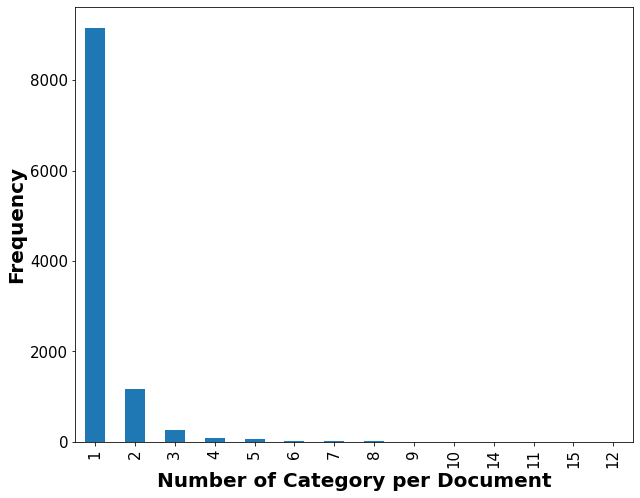

In [32]:
fig, axs = plt.subplots(1,1,figsize=(10,8)) 
cat_num_doc["cat_num_doc"].value_counts().plot(ax=axs, kind='bar')

plt.xlabel('Number of Category per Document',fontsize=20, weight = 'bold')
plt.ylabel('Frequency',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### distribution of doc number per category

In [41]:
doc_num_cat = whole_data.sum(0)
doc_num_cat = pd.DataFrame(doc_num_cat)
doc_num_cat.columns = ['doc_num_cat']
doc_num_cat = doc_num_cat.sort_values(by = ['doc_num_cat'], ascending = False)
doc_num_cat = doc_num_cat.reset_index()


,index,doc_num_cat
0,earn,3964
1,acq,2369
2,money-fx,717
3,grain,582
4,crude,578
...,...,...
85,sun-meal,2
86,groundnut-oil,2
87,rye,2
88,lin-oil,2


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

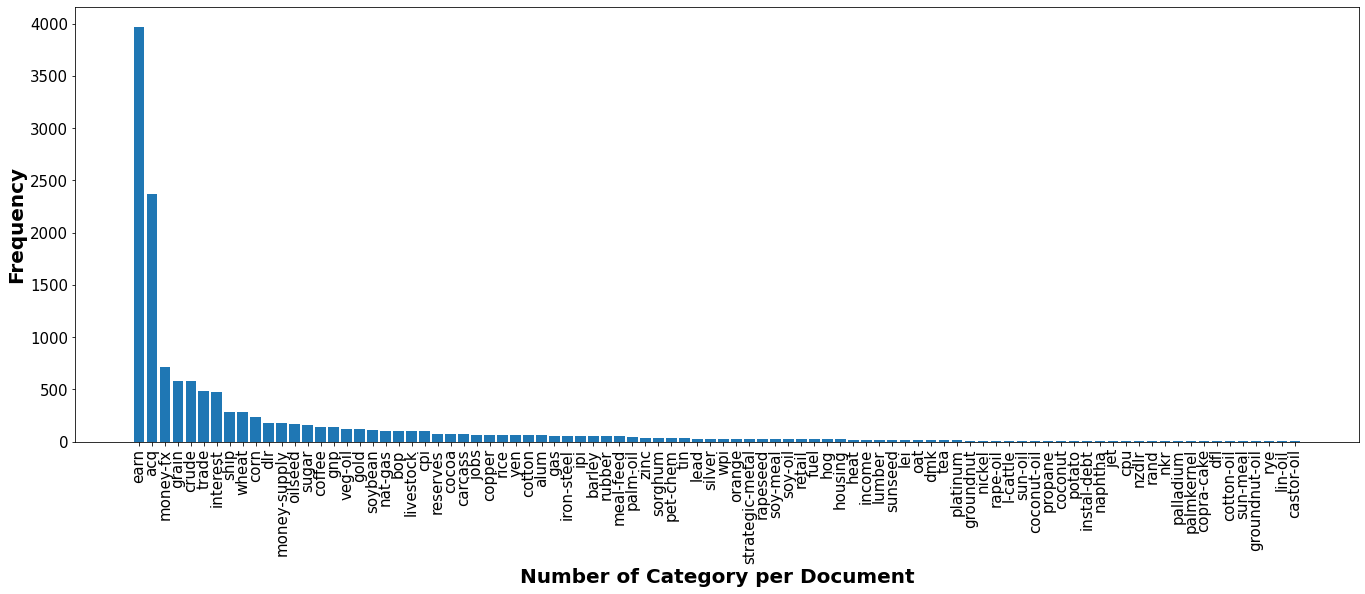

In [49]:
fig, axs = plt.subplots(1,1,figsize=(23,8)) 

plt.bar(doc_num_cat['index'], doc_num_cat['doc_num_cat'])

plt.xlabel('Number of Document per Category',fontsize=20, weight = 'bold')
plt.ylabel('Frequency',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)

## Creating Dataframe for applying transformations

In [50]:
trainData = {"content": train_documents}
testData = {"content": test_documents}
trainDf = pd.DataFrame(trainData, columns=["content"])
testDf = pd.DataFrame(testData, columns=["content"])

In [54]:
whole_data = pd.concat([trainDf, testDf], axis = 0).reset_index(drop = True)

In [65]:
wordcount_file = [len(i.strip()) for i in whole_data['content']]
np.mean(wordcount_file)

814.9999073044123

In [76]:
tmp = []
for i in wordcount_file:
    if i <=500:
        tmp.append(i)
len(tmp) 

5106

In [66]:
np.std(wordcount_file)

883.1324548422452

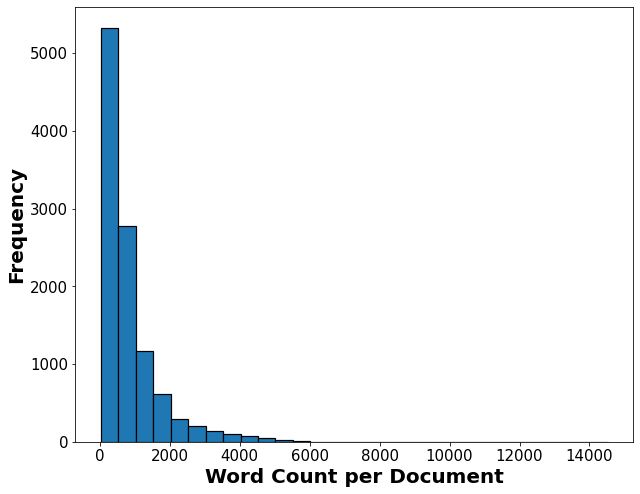

In [69]:
fig, axs = plt.subplots(1,1,figsize=(10,8)) 

binwidth = 500
plt.hist(wordcount_file, bins=range(min(wordcount_file), max(wordcount_file) + binwidth, binwidth), edgecolor='black', linewidth=1.2)

plt.xlabel('Word Count per Document',fontsize=20, weight = 'bold')
plt.ylabel('Frequency',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()

## Pre-process the input data

In [52]:
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords = set(w.rstrip() for w in open("../../nltk_data/corpora/reuters/stopwords"))

def tokenize_lemma_stopwords(text):
    text = text.replace("\n", " ")
    tokens = nltk.tokenize.word_tokenize(text.lower()) # split string into words (tokens)
    tokens = [t for t in tokens if t.isalpha()] # keep strings with only alphabets
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [stemmer.stem(t) for t in tokens]
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    cleanedText = " ".join(tokens)
    return cleanedText

def dataCleaning(df):
    data = df.copy()
    data["content"] = data["content"].apply(tokenize_lemma_stopwords)
    return data

In [53]:
cleanedTrainData = dataCleaning(trainDf)
cleanedTestData = dataCleaning(testDf)

# Create TF-IDF Vectorizer (Bag of Words)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer()
vectorised_train_documents = vectorizer.fit_transform(cleanedTrainData["content"])
vectorised_test_documents = vectorizer.transform(cleanedTestData["content"])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

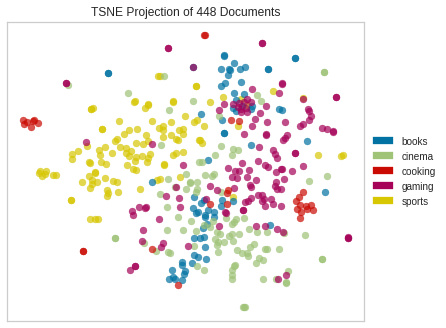

<AxesSubplot:title={'center':'TSNE Projection of 448 Documents'}>

In [85]:
from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus.data)
y = corpus.target

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

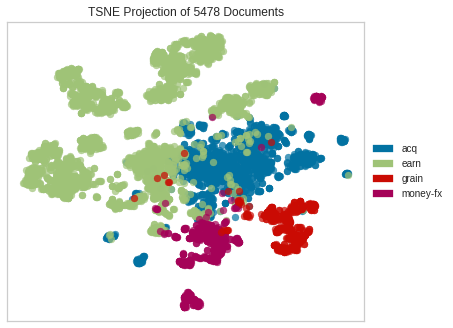

<AxesSubplot:title={'center':'TSNE Projection of 5478 Documents'}>

In [95]:
from yellowbrick.text import TSNEVisualizer

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()

y = []
index = []
for i in range(len(train_labels)):
    if train_labels['earn'][i] == 1:
        index.append(i)
        y.append('earn')
    elif train_labels['acq'][i] == 1:
        index.append(i)
        y.append('acq')
    elif train_labels['money-fx'][i] == 1:
        index.append(i)
        y.append('money-fx')
    elif train_labels['grain'][i] == 1:
        index.append(i)
        y.append('grain')
        
tsne.fit(vectorised_train_documents[index,:], y)
tsne.show()

In [102]:
import time
from sklearn.manifold import TSNE

df_subset = pd.DataFrame(vectorised_train_documents[index,:])
data_subset = vectorised_train_documents[index,:]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5478 samples in 0.001s...
[t-SNE] Computed neighbors for 5478 samples in 2.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5478
[t-SNE] Computed conditional probabilities for sample 2000 / 5478
[t-SNE] Computed conditional probabilities for sample 3000 / 5478
[t-SNE] Computed conditional probabilities for sample 4000 / 5478
[t-SNE] Computed conditional probabilities for sample 5000 / 5478
[t-SNE] Computed conditional probabilities for sample 5478 / 5478
[t-SNE] Mean sigma: 0.340007
[t-SNE] KL divergence after 250 iterations with early exaggeration: 113.022453
[t-SNE] KL divergence after 300 iterations: 3.707652
t-SNE done! Time elapsed: 18.988540649414062 seconds


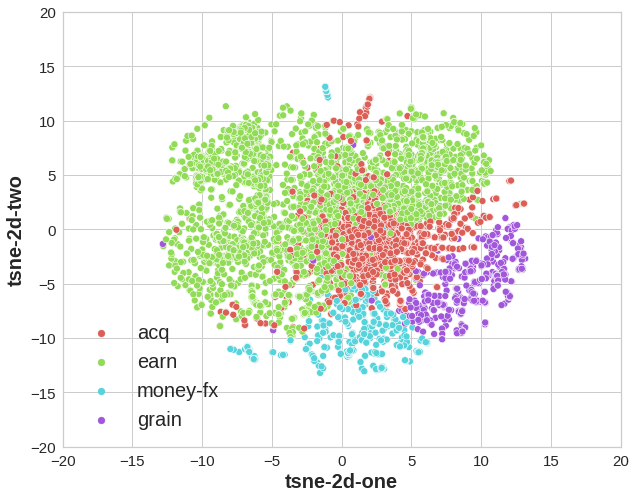

In [113]:
import seaborn as sns
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = y
plt.figure(figsize=(10,8))
plt.xlim(-20, 20)
plt.ylim(-20, 20)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)
plt.xlabel('tsne-2d-one',fontsize=20, weight = 'bold')
plt.ylabel('tsne-2d-two',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 20)

## Train and Evaluate Classifiers

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

ModelsPerformance = {}

def metricsReport(modelName, test_labels, predictions):
    accuracy = accuracy_score(test_labels, predictions)

    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    micro_precision = precision_score(test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + modelName + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"\
          .format(accuracy, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))
    ModelsPerformance[modelName] = micro_f1

In [58]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(vectorised_train_documents, train_labels)

svmPreds = svmClassifier.predict(vectorised_test_documents)
metricsReport("SVC Sq. Hinge Loss", test_labels, svmPreds)

------SVC Sq. Hinge Loss Model Metrics-----
Accuracy: 0.8115
Hamming Loss: 0.0034
Precision:
  - Macro: 0.6485
  - Micro: 0.9445
Recall:
  - Macro: 0.3961
  - Micro: 0.8007
F1-measure:
  - Macro: 0.4680
  - Micro: 0.8667


# Word2Vec

In [165]:
## for word embedding
import gensim
import gensim.downloader as gensim_api
nlp = gensim_api.load("word2vec-google-news-300")

In [166]:
# from https://github.com/giannisnik/mpad/blob/master/mpad/utils.py
def load_embeddings(model, vocab):
    word_vecs = np.zeros((len(vocab)+1, 300))
    unknown_words = set()
    #model = KeyedVectors.load_word2vec_format(fname, binary=True)
    for word in vocab:
        if word in model:
            word_vecs[vocab[word],:] = model[word]
        else:
            unknown_words.add(word)
            word_vecs[vocab[word],:] = np.random.uniform(-0.25, 0.25, 300)
    print("Existing vectors:", len(vocab)-len(unknown_words))
    return word_vecs

def get_vocab(docs):
    vocab = dict()
    
    for index, row in docs.iterrows():
        doc = row['content'].split()
        
        for word in doc:
            if word not in vocab:
                vocab[word] = len(vocab)+1

    print("Vocabulary size: ", len(vocab))
        
    return vocab

In [167]:
vocab = get_vocab(pd.concat([cleanedTrainData, cleanedTestData]))
embeddings = load_embeddings(nlp, vocab)

Vocabulary size:  19906
Existing vectors: 7940


In [168]:
embeddings.shape

(19907, 300)

In [169]:
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

In [170]:
def text2seq(docs, vocab, maxlen):
    res = []
    for index, row in docs.iterrows():
        doc = row['content'].split()
        tmp = []
        if len(doc) > maxlen:
            for i in range(maxlen): # for each doc, keep maxlen words
                tmp.append(vocab[doc[i]])
        else:
            for i in range(len(doc)):
                tmp.append(vocab[doc[i]])
            for i in range(maxlen - len(doc)):
                tmp.append(0)
        res.append(tmp)
        
    return np.array(res)


In [171]:
maxlen = 60 # how many words to check at each document
X_train = text2seq(cleanedTrainData, vocab, maxlen)
X_test = text2seq(cleanedTestData, vocab, maxlen)

# ## encode y
# dic_y_mapping = {n:label for n,label in 
#                  enumerate(np.unique(train_labels))}
# inverse_dic = {v:k for k,v in dic_y_mapping.items()}
# y_train = np.array([inverse_dic[y] for y in y_train])


In [172]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

## input
x_in = layers.Input(shape=(maxlen,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=maxlen, trainable=False)(x_in)
## apply attention
#x = attention_layer(x, neurons=15)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=maxlen, dropout=0.2, 
                         return_sequences=True))(x) #  return_sequences=True return the whole sequence from LSTM cells
x = layers.Bidirectional(layers.LSTM(units=maxlen, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(90, activation='sigmoid')(x) # 90 possible categories # multi-label classification, use sigmoid
## compile
model = models.Model(x_in, y_out)
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 60, 300)           5972100   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 60, 120)           173280    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 120)               86880     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                7744      
_________________________________________________________________
dense_19 (Dense)             (None, 90)                5850      
Total params: 6,245,854
Trainable params: 273,754
Non-trainable params: 5,972,100
___________________________________________

In [173]:
## train
training = model.fit(x=X_train, y=train_labels, validation_data=(X_test, test_labels), batch_size=256, 
                     epochs=500, shuffle=True, verbose=1) #validation_split=0.3
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

Epoch 1/500
31/31 [==============================] - 16s 336ms/step - loss: 0.5536 - accuracy: 1.3817e-04 - val_loss: 0.0797 - val_accuracy: 3.3124e-04
Epoch 2/500
31/31 [==============================] - 10s 318ms/step - loss: 0.0632 - accuracy: 0.2332 - val_loss: 0.0520 - val_accuracy: 0.3587
Epoch 3/500
31/31 [==============================] - 9s 287ms/step - loss: 0.0506 - accuracy: 0.3672 - val_loss: 0.0504 - val_accuracy: 0.3587
Epoch 4/500
31/31 [==============================] - 9s 298ms/step - loss: 0.0498 - accuracy: 0.3640 - val_loss: 0.0500 - val_accuracy: 0.3587
Epoch 5/500
31/31 [==============================] - 9s 292ms/step - loss: 0.0489 - accuracy: 0.3593 - val_loss: 0.0490 - val_accuracy: 0.3587
Epoch 6/500
31/31 [==============================] - 9s 293ms/step - loss: 0.0483 - accuracy: 0.3785 - val_loss: 0.0473 - val_accuracy: 0.4164
Epoch 7/500
31/31 [==============================] - 9s 297ms/step - loss: 0.0449 - accuracy: 0.4504 - val_loss: 0.0442 - val_accura

Epoch 58/500
31/31 [==============================] - 9s 284ms/step - loss: 0.0114 - accuracy: 0.8298 - val_loss: 0.0177 - val_accuracy: 0.7890
Epoch 59/500
31/31 [==============================] - 9s 289ms/step - loss: 0.0111 - accuracy: 0.8313 - val_loss: 0.0178 - val_accuracy: 0.7883
Epoch 60/500
31/31 [==============================] - 9s 281ms/step - loss: 0.0111 - accuracy: 0.8326 - val_loss: 0.0178 - val_accuracy: 0.7926
Epoch 61/500
31/31 [==============================] - 9s 286ms/step - loss: 0.0104 - accuracy: 0.8405 - val_loss: 0.0177 - val_accuracy: 0.7950
Epoch 62/500
31/31 [==============================] - 9s 290ms/step - loss: 0.0104 - accuracy: 0.8405 - val_loss: 0.0174 - val_accuracy: 0.7960
Epoch 63/500
31/31 [==============================] - 9s 276ms/step - loss: 0.0097 - accuracy: 0.8449 - val_loss: 0.0176 - val_accuracy: 0.7989
Epoch 64/500
31/31 [==============================] - 9s 286ms/step - loss: 0.0100 - accuracy: 0.8436 - val_loss: 0.0179 - val_accuracy:

Epoch 115/500
31/31 [==============================] - 9s 279ms/step - loss: 0.0035 - accuracy: 0.8960 - val_loss: 0.0194 - val_accuracy: 0.8344
Epoch 116/500
31/31 [==============================] - 9s 277ms/step - loss: 0.0036 - accuracy: 0.8992 - val_loss: 0.0203 - val_accuracy: 0.8304
Epoch 117/500
31/31 [==============================] - 9s 275ms/step - loss: 0.0035 - accuracy: 0.8941 - val_loss: 0.0192 - val_accuracy: 0.8311
Epoch 118/500
31/31 [==============================] - 9s 287ms/step - loss: 0.0035 - accuracy: 0.9000 - val_loss: 0.0197 - val_accuracy: 0.8294
Epoch 119/500
31/31 [==============================] - 9s 282ms/step - loss: 0.0035 - accuracy: 0.8960 - val_loss: 0.0199 - val_accuracy: 0.8314
Epoch 120/500
31/31 [==============================] - 9s 278ms/step - loss: 0.0035 - accuracy: 0.8965 - val_loss: 0.0205 - val_accuracy: 0.8254
Epoch 121/500
31/31 [==============================] - 8s 273ms/step - loss: 0.0034 - accuracy: 0.8957 - val_loss: 0.0200 - val_ac

31/31 [==============================] - 9s 285ms/step - loss: 8.4101e-04 - accuracy: 0.9070 - val_loss: 0.0317 - val_accuracy: 0.8327
Epoch 228/500
31/31 [==============================] - 9s 293ms/step - loss: 8.9222e-04 - accuracy: 0.9056 - val_loss: 0.0320 - val_accuracy: 0.8360
Epoch 229/500
31/31 [==============================] - 9s 288ms/step - loss: 0.0011 - accuracy: 0.9026 - val_loss: 0.0313 - val_accuracy: 0.8357
Epoch 230/500
31/31 [==============================] - 9s 282ms/step - loss: 9.8552e-04 - accuracy: 0.9023 - val_loss: 0.0325 - val_accuracy: 0.8324
Epoch 231/500
31/31 [==============================] - 9s 277ms/step - loss: 0.0010 - accuracy: 0.9040 - val_loss: 0.0302 - val_accuracy: 0.8360
Epoch 232/500
31/31 [==============================] - 9s 277ms/step - loss: 9.2355e-04 - accuracy: 0.9014 - val_loss: 0.0318 - val_accuracy: 0.8341
Epoch 233/500
31/31 [==============================] - 9s 277ms/step - loss: 9.4661e-04 - accuracy: 0.9053 - val_loss: 0.0316 - 

KeyboardInterrupt: 

In [162]:
## test
th = 0.5
LSTM_preds = model.predict(X_test)
LSTM_preds[LSTM_preds>=th] = 1
LSTM_preds[LSTM_preds<th] = 0

In [163]:
metricsReport("LSTM (Word2Vec)", test_labels, LSTM_preds)

------LSTM (Word2Vec) Model Metrics-----
Accuracy: 0.7820
Hamming Loss: 0.0047
Precision:
  - Macro: 0.5521
  - Micro: 0.8540
Recall:
  - Macro: 0.3966
  - Micro: 0.7986
F1-measure:
  - Macro: 0.4425
  - Micro: 0.8254


In [158]:
train_labels.shape

(7769, 90)

# BERT Bidirectional Encoder Representations from Transformers

In [287]:
## for bert language model
import transformers
import re

In [288]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

train_texts = trainDf["content"].to_list()

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
#valid_encodings = tokenizer(valid_texts, truncation=True, padding=True)
#test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [289]:
## inputs
input_ids = layers.Input((512), dtype="int32", name="input_idx")
token_type_ids = layers.Input((512), dtype="int32", name="input_masks")
attention_mask = layers.Input((512), dtype="int32", name="input_segments")
## pre-trained bert
nlp = transformers.TFBertModel.from_pretrained("bert-base-uncased")
bert_out = nlp(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)[0]
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out)
x = layers.Dense(64, activation="relu")(x)
y_out = layers.Dense(90, 
                     activation='sigmoid')(x)
## compile
model = models.Model([input_ids, token_type_ids, attention_mask], y_out)
for layer in model.layers[:4]:
    layer.trainable = False
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config o

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_idx (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_segments (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 512)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_4 (TFBertModel)   TFBaseModelOutputWit 109482240   input_idx[0][0]                  
                                                                 input_segments[0][0]      

In [ ]:
training = model.fit(x=[np.array(train_encodings['input_ids']), np.array(train_encodings['token_type_ids']), np.array(train_encodings['attention_mask'])], y=train_labels, batch_size=256, 
                     epochs=100, shuffle=True, verbose=1) 

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Epoch 1/100



The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


31/31 [==============================] - 5795s 186s/step - loss: 0.5866 - accuracy: 0.0684
Epoch 2/100
31/31 [==============================] - 5698s 184s/step - loss: 0.1071 - accuracy: 0.1103
Epoch 3/100
31/31 [==============================] - 5682s 183s/step - loss: 0.0477 - accuracy: 0.4775
Epoch 4/100
31/31 [==============================] - 5714s 184s/step - loss: 0.0432 - accuracy: 0.5300
Epoch 5/100
31/31 [==============================] - 5713s 184s/step - loss: 0.0403 - accuracy: 0.5495
Epoch 6/100
31/31 [==============================] - 5697s 184s/step - loss: 0.0377 - accuracy: 0.5723
Epoch 7/100
31/31 [==============================] - 5636s 182s/step - loss: 0.0358 - accuracy: 0.6000
Epoch 8/100
31/31 [==============================] - 5027s 162s/step - loss: 0.0351 - accuracy: 0.6081
Epoch 9/100
31/31 [==============================] - 4977s 160s/step - loss: 0.0332 - accuracy: 0.6214
Epoch 10/100
31/31 [==============================] - 4970s 160s/step - loss: 0.0314 

In [219]:
## pre-trained bert
nlp = transformers.TFBertModel.from_pretrained("bert-base-uncased")
bert_out, _ = nlp([idx, masks, segments])
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out)
x = layers.Dense(64, activation="relu")(x)
y_out = layers.Dense(len(np.unique(y_train)), 
                     activation='softmax')(x)
## compile
model = models.Model([idx, masks, segments], y_out)
for layer in model.layers[:4]:
    layer.trainable = False
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
model.summary()

49

In [214]:
seq.split(" ")

['[CLS]',
 'bahia',
 'cocoa',
 'review',
 'showers',
 'continued',
 'throughout',
 'the',
 'week',
 'in',
 'the',
 'bahia',
 'cocoa',
 'zone',
 'all',
 '##ev',
 '[SEP]',
 '',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [206]:
seq.split(" ")

['[CLS]',
 'bahia',
 'cocoa',
 'review',
 'showers',
 'continued',
 'throughout',
 'the',
 'week',
 'in',
 'the',
 'bahia',
 'cocoa',
 'zone',
 'all',
 '##ev',
 '[SEP]',
 '',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']